# 3. Feature Engineering

For this image classification project, there were two parts for feature engineering: **class imbalance issue** and **train/test split**.

For the training data, the following strategies were implemented to investigate the **imbalanced class issue**:
* using raw input without augmentation (different classes are imbalanced; varying from 152 to 5.5k)
* using augementated input data (different classes are imbalanced; varying from 1k to 5.5k)
* using Bootstrapping to draw 200 images from each class in the raw input for 5 times (different classes are balanced)
* using Bootstrapping to draw 1k images from each class in the augmented input for 5 times (different classes are balanced)

In [1]:
# import libaries
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf

## 3.1. Train / Test Split

In [12]:
# Create directory to data before splitting
data_dir = '..\\data\\Plant_leave_diseases_dataset_without_augmentation_train_data'
os.listdir(data_dir)

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Background_without_leaves',
 'Blueberry___healthy',
 'Cherry___healthy',
 'Cherry___Powdery_mildew',
 'Corn___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn___Common_rust',
 'Corn___healthy',
 'Corn___Northern_Leaf_Blight',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___healthy',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___healthy',
 'Potato___Late_blight',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___healthy',
 'Strawberry___Leaf_scorch',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___healthy',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 '

In [13]:
# define a function to move a image from its original path to a new path
from PIL import Image

def process_image(source_path, destination_path, image_name):
    # Step 1: Check if destination_path exists, if not, create it
    if not os.path.exists(destination_path):
        os.makedirs(destination_path)
    # Step 2: Get full path to the file
    source = os.path.join(source_path, image_name)
    destination = os.path.join(destination_path, image_name)
    # Step 3: Read the image
    with Image.open(source) as img:
        # Step 4: Save it to a new path
        
            img.save(destination)
        
    # Step 5: Delete the original file
    os.remove(source)

In [14]:
# split test data from the original
import random

out_dir = '..\\data\\Plant_leave_diseases_dataset_without_augmentation_test_data'

for img_class in os.listdir(data_dir):
    # generate a list of all images in this class folder
    imglist = os.listdir(os.path.join(data_dir, img_class))
    # split test data out
    imgnum = len(imglist)
    test_size = 0.2
    imgnum_test = int(imgnum * test_size)    
    test_sample = random.sample(imglist, imgnum_test)
    # for each image in the test_sample, will cut it to the test data folder
    for img_name in test_sample:
        source_path = os.path.join(data_dir, img_class)
        desti_path = os.path.join(out_dir, img_class)
        process_image(source_path, desti_path, img_name)


In [21]:
# check how many images in each folder after train/test split

train_test_ratios = []
train_imgnum_list = []
test_imgnum_list = []

for img_class in os.listdir(data_dir):
    imgnum_train = len(os.listdir(os.path.join(data_dir, img_class)))
    imgnum_test = len(os.listdir(os.path.join(out_dir, img_class)))
    train_test_ratios.append(imgnum_train / imgnum_test)
    train_imgnum_list.append(imgnum_train)
    test_imgnum_list.append(imgnum_test)
    print(f'Total number of training images is {imgnum_train} under {os.path.join(data_dir, img_class)}.')
    print(f'Total number of testing images  is {imgnum_test} under {os.path.join(out_dir, img_class)}.')    
    print(f'Train/Test ratio is {imgnum_train / imgnum_test} for {img_class}.')

Total number of training images is 504 under ..\data\Plant_leave_diseases_dataset_without_augmentation_train_data\Apple___Apple_scab.
Total number of testing images  is 126 under ..\data\Plant_leave_diseases_dataset_without_augmentation_test_data\Apple___Apple_scab.
Train/Test ratio is 4.0 for Apple___Apple_scab.
Total number of training images is 497 under ..\data\Plant_leave_diseases_dataset_without_augmentation_train_data\Apple___Black_rot.
Total number of testing images  is 124 under ..\data\Plant_leave_diseases_dataset_without_augmentation_test_data\Apple___Black_rot.
Train/Test ratio is 4.008064516129032 for Apple___Black_rot.
Total number of training images is 220 under ..\data\Plant_leave_diseases_dataset_without_augmentation_train_data\Apple___Cedar_apple_rust.
Total number of testing images  is 55 under ..\data\Plant_leave_diseases_dataset_without_augmentation_test_data\Apple___Cedar_apple_rust.
Train/Test ratio is 4.0 for Apple___Cedar_apple_rust.
Total number of training im

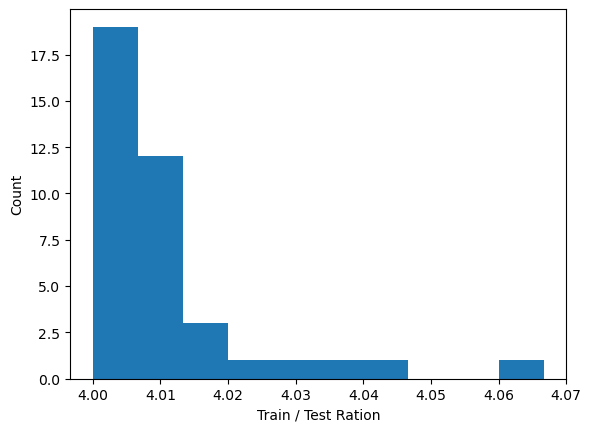

In [20]:
# plot the histogram of train test ratios to check for outliers
plt.hist(train_test_ratios)
plt.xlabel('Train / Test Ration')
plt.ylabel('Count')
plt.show()

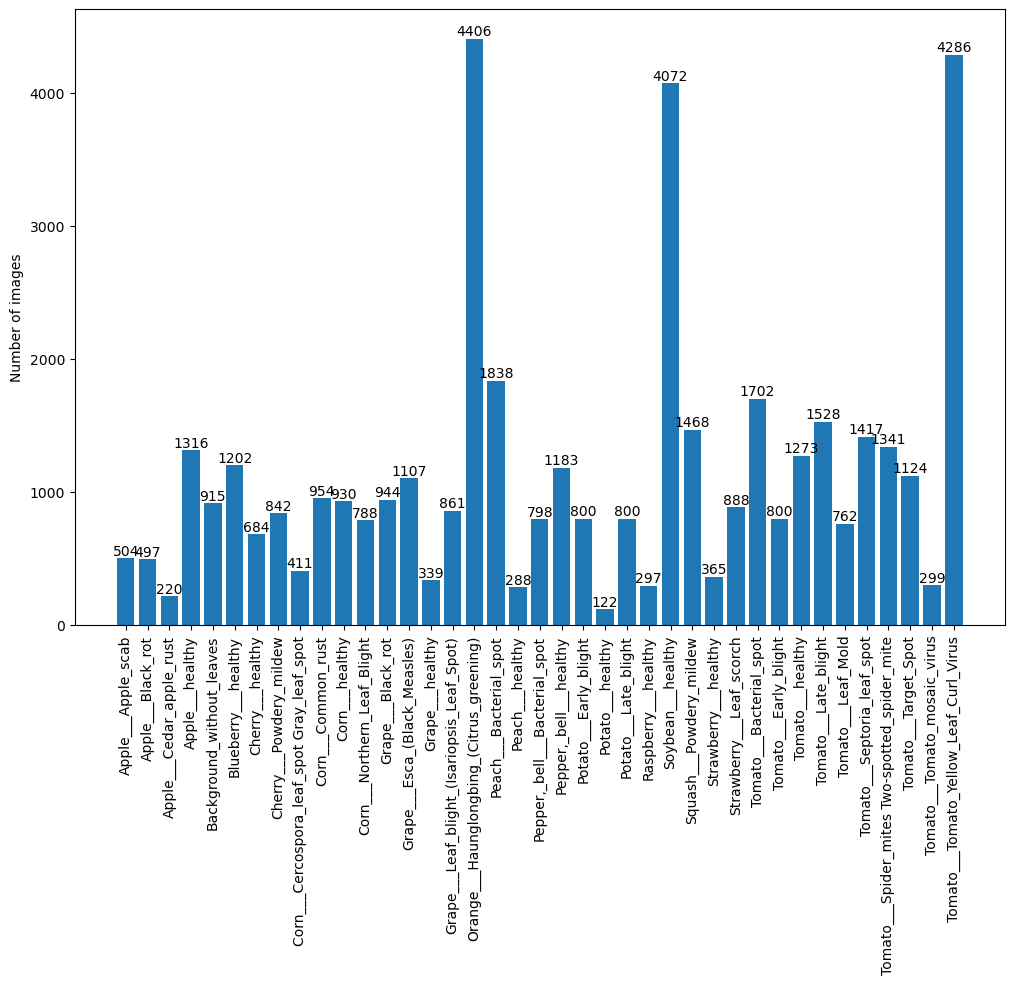

In [36]:
# check the class with minimum number of images in training data
class_list = os.listdir(data_dir)
train_imgnum_dict = dict(zip(class_list, train_imgnum_list))
test_imgnum_dict = dict(zip(class_list, test_imgnum_list))

plt.figure(figsize = (12, 8))
bars = bars = plt.bar(train_imgnum_dict.keys(), train_imgnum_dict.values())

# Function to annotate the bars
def annotate_bars(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5, 
                 str(int(height)), ha='center', va='bottom')

# Annotate bars with their respective values
annotate_bars(bars)

plt.ylabel('Number of images')
plt.xticks(rotation = 90)
plt.show()

**Note:**
* 20% of images are separated from the original and will serve as the test data for model evaluations.
* Training data after splitting will be the 1st data option for classs imbalance investigation.
  * using raw input without augmentation (different classes are imbalanced; varying from 122 to 4406k)

## 3.2. Strategies for Class Imbalance Issue

### 3.2.1. Image Augmentation to 1K for Each Class

In [37]:
# define a function to add random noise to images
# tensorflow.keras.preprocessing.image.ImageDataGenerator can not add random noise
# but can take a function as a preprocessing step
# add_noise funtion is defined here
def add_noise(img):
    '''Add random noise to an image'''
    VARIABILITY = 15
    deviation = VARIABILITY*random.random()
    noise = np.random.normal(0, deviation, img.shape)  # random noise will follow a random distribution with 0 as mean and deviation as std 
    img += noise
    return img

In [38]:
# define the image generator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
         zca_epsilon = 1e-6,
         zca_whitening = True,
         rotation_range = 90,
         brightness_range = [0.1, 1.5],
         zoom_range = 0.1,
         fill_mode = 'nearest',
         cval = 125,
         horizontal_flip = True,
         vertical_flip = True,
         preprocessing_function = add_noise)

C:\Users\wfei2\anaconda3\lib\site-packages\keras\src\preprocessing\image.py:1444: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn(


In [40]:
# define the folder for data augmentation (it has all training data without augmentation)
data_dir2 = '..\\data\\Plant_leave_diseases_dataset_with_augmentation_train_data'
os.listdir(data_dir2)

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Background_without_leaves',
 'Blueberry___healthy',
 'Cherry___healthy',
 'Cherry___Powdery_mildew',
 'Corn___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn___Common_rust',
 'Corn___healthy',
 'Corn___Northern_Leaf_Blight',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___healthy',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___healthy',
 'Potato___Late_blight',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___healthy',
 'Strawberry___Leaf_scorch',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___healthy',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 '

In [42]:
# generate images for each subfolder until there are 1k images
for img_class in os.listdir(data_dir2):
    init = len(os.listdir(os.path.join(data_dir2, img_class)))
    # if there are more than 1k images in the class, then skip the augmentation
    if init >= 1000:
        continue
    if img_class == 'Background_without_leaves':
        continue
    # create a list containing all original images
    imgdata = []
    for img_name in os.listdir(os.path.join(data_dir2, img_class)):
        if (img_name.split('.')[1] == 'JPG'):
            img = cv2.imread(os.path.join(data_dir2, img_class, img_name))
            imgdata.append(img)
    # perform batch image augmentation
    x = np.array(imgdata)
    for batch in datagen.flow(x, batch_size = 32,
                         save_to_dir = os.path.join(data_dir2, img_class),
                         save_prefix = 'aug',
                         save_format = 'jpg'):
        # stop the augmentation when reaching 1k images
        i = len(os.listdir(os.path.join(data_dir2, img_class)))
        if i >= 1000:
            break

In [43]:
# check how many images there are in each class after augmentation

train_imgnum_aug_list = []

for img_class in os.listdir(data_dir2):
    imgnum = len(os.listdir(os.path.join(data_dir2, img_class)))
    train_imgnum_aug_list.append(imgnum)
    print(f'Total number of images after augmentation is {imgnum} under {os.path.join(data_dir2, img_class)}')

Total number of images after augmentation is 1008 under ..\data\Plant_leave_diseases_dataset_with_augmentation_train_data\Apple___Apple_scab
Total number of images after augmentation is 1026 under ..\data\Plant_leave_diseases_dataset_with_augmentation_train_data\Apple___Black_rot
Total number of images after augmentation is 1008 under ..\data\Plant_leave_diseases_dataset_with_augmentation_train_data\Apple___Cedar_apple_rust
Total number of images after augmentation is 1316 under ..\data\Plant_leave_diseases_dataset_with_augmentation_train_data\Apple___healthy
Total number of images after augmentation is 915 under ..\data\Plant_leave_diseases_dataset_with_augmentation_train_data\Background_without_leaves
Total number of images after augmentation is 1202 under ..\data\Plant_leave_diseases_dataset_with_augmentation_train_data\Blueberry___healthy
Total number of images after augmentation is 1004 under ..\data\Plant_leave_diseases_dataset_with_augmentation_train_data\Cherry___healthy
Total 

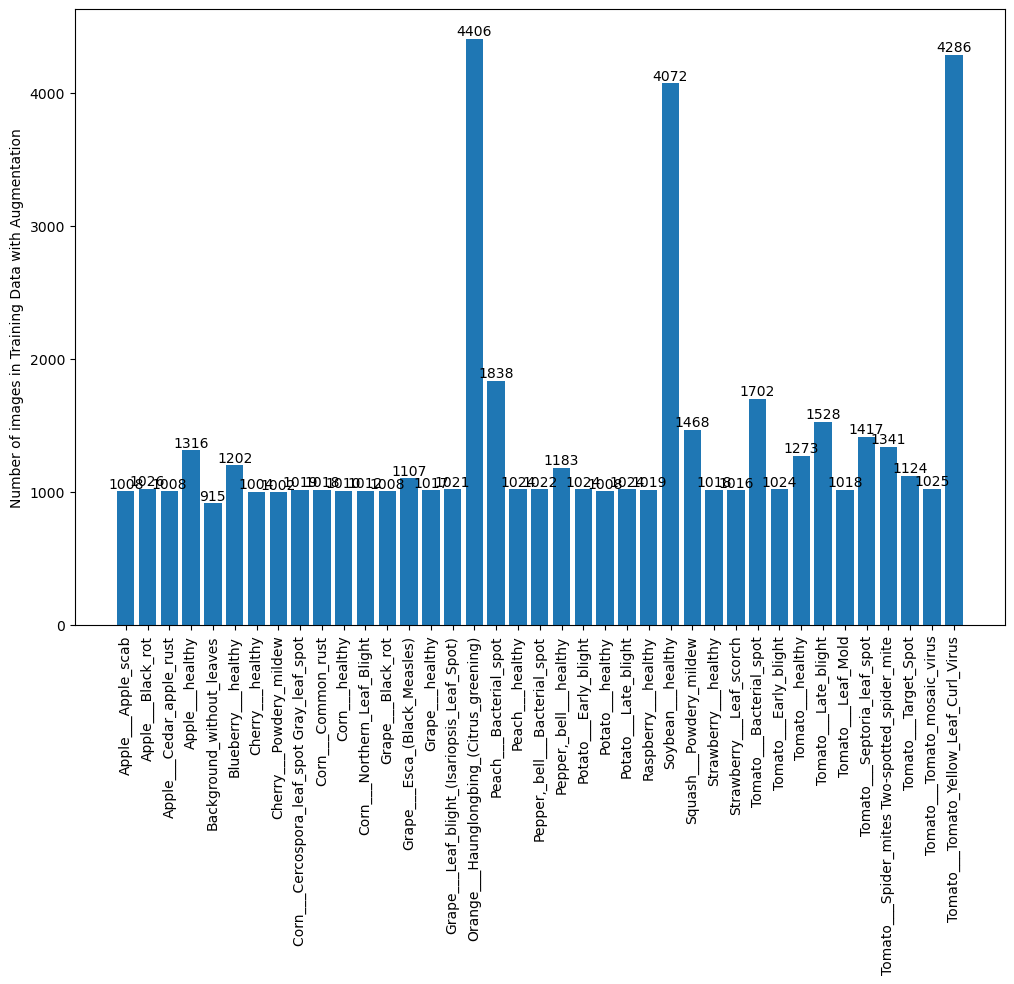

In [44]:
# check the numbers of images after augmentation
class_list2 = os.listdir(data_dir2)
train_imgnum_aug_dict = dict(zip(class_list2, train_imgnum_aug_list))

plt.figure(figsize = (12, 8))
bars = bars = plt.bar(train_imgnum_aug_dict.keys(), train_imgnum_aug_dict.values())

# Function to annotate the bars
def annotate_bars(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5, 
                 str(int(height)), ha='center', va='bottom')

# Annotate bars with their respective values
annotate_bars(bars)

plt.ylabel('Number of images in Training Data with Augmentation')
plt.xticks(rotation = 90)
plt.show()

**Note:**
* This set of training data with augmentation is the 2nd data option for classs imbalance investigation.
  * using augementated input data (different classes are imbalanced; varying from 915 to 4406)

### 3.2.2. Bootstraping on Train Data without Augmentation

* using Bootstrapping to draw 200 images from each class in the raw training data for 5 times (different classes are balanced)

In [48]:
# define a function to copy a image from its original path to a new path
from PIL import Image

def copy_image(source_path, destination_path, image_name):
    # Step 1: Check if destination_path exists, if not, create it
    if not os.path.exists(destination_path):
        os.makedirs(destination_path)
    # Step 2: Get full path to the file
    source = os.path.join(source_path, image_name)
    destination = os.path.join(destination_path, image_name)
    # Step 3: Read the image
    with Image.open(source) as img:
        # Step 4: Save it to a new path
        
            img.save(destination)

In [68]:
# define a function to do bootstrapping to randomly pick 200 images from each class in the training data

def boostrap_train(out_dir_bs, data_dir):
    for img_class in os.listdir(data_dir):
        # generate a list of all images in this class folder
        imglist = os.listdir(os.path.join(data_dir, img_class))
        #print(len(imglist))
        # boostrapping    
        bs_sample = random.choices(imglist, k = 300)
        # for each image in the test_sample, will cut it to the test data folder
        for img_name in bs_sample:
            source_path = os.path.join(data_dir, img_class)
            desti_path = os.path.join(out_dir_bs, img_class)
            copy_image(source_path, desti_path, img_name)

In [63]:
# define a function to generate list of image numbers of each class in a data folder 
def imgnum_list(out_dir):
    imgnum_list = []
    for img_class in os.listdir(out_dir):
        imgnum = len(os.listdir(os.path.join(out_dir, img_class)))
        imgnum_list.append(imgnum)
        print(f'Total number of images after bootstrapping is {imgnum} under {os.path.join(out_dir, img_class)}')
    return imgnum_list

In [71]:
# define a function to plot the image numbers of each class in a data folder
def imgnum_barplot(data_dir2):
    class_list2 = os.listdir(data_dir2)
    imgnum_list = []
    for img_class in os.listdir(data_dir2):
        imgnum = len(os.listdir(os.path.join(data_dir2, img_class)))
        imgnum_list.append(imgnum)
    train_imgnum_aug_dict = dict(zip(class_list2, imgnum_list))

    plt.figure(figsize = (12, 8))
    bars = bars = plt.bar(train_imgnum_aug_dict.keys(), train_imgnum_aug_dict.values())

    # Function to annotate the bars
    def annotate_bars(bars):
        for bar in bars:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5, 
                 str(int(height)), ha='center', va='bottom')

    # Annotate bars with their respective values
    annotate_bars(bars)

    plt.ylabel('Number of images in Training Data in {data_dir2}')
    plt.xticks(rotation = 90)
    plt.show()

In [64]:
out_dir_bs = '..\\data\\Plant_leave_diseases_dataset_without_augmentation_train_data_bs_'+'2'
data_dir = '..\\data\\Plant_leave_diseases_dataset_without_augmentation_train_data'

boostrap_train(out_dir_bs, data_dir)
train_imgnum_bs2_list = imgnum_list(out_dir_bs)

Total number of images after bootstrapping is 221 under ..\data\Plant_leave_diseases_dataset_without_augmentation_train_data_bs_2\Apple___Apple_scab
Total number of images after bootstrapping is 221 under ..\data\Plant_leave_diseases_dataset_without_augmentation_train_data_bs_2\Apple___Black_rot
Total number of images after bootstrapping is 158 under ..\data\Plant_leave_diseases_dataset_without_augmentation_train_data_bs_2\Apple___Cedar_apple_rust
Total number of images after bootstrapping is 275 under ..\data\Plant_leave_diseases_dataset_without_augmentation_train_data_bs_2\Apple___healthy
Total number of images after bootstrapping is 251 under ..\data\Plant_leave_diseases_dataset_without_augmentation_train_data_bs_2\Background_without_leaves
Total number of images after bootstrapping is 264 under ..\data\Plant_leave_diseases_dataset_without_augmentation_train_data_bs_2\Blueberry___healthy
Total number of images after bootstrapping is 237 under ..\data\Plant_leave_diseases_dataset_wit

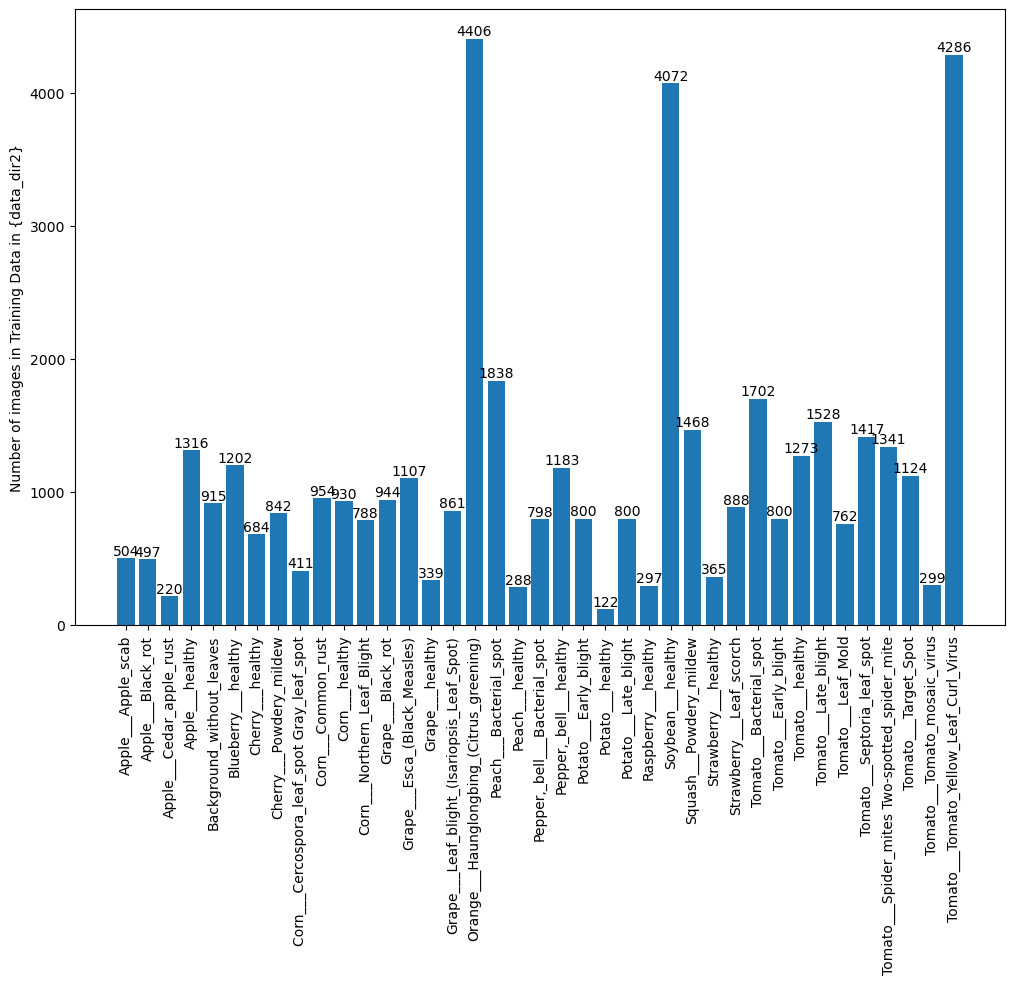

In [73]:
imgnum_barplot(data_dir)

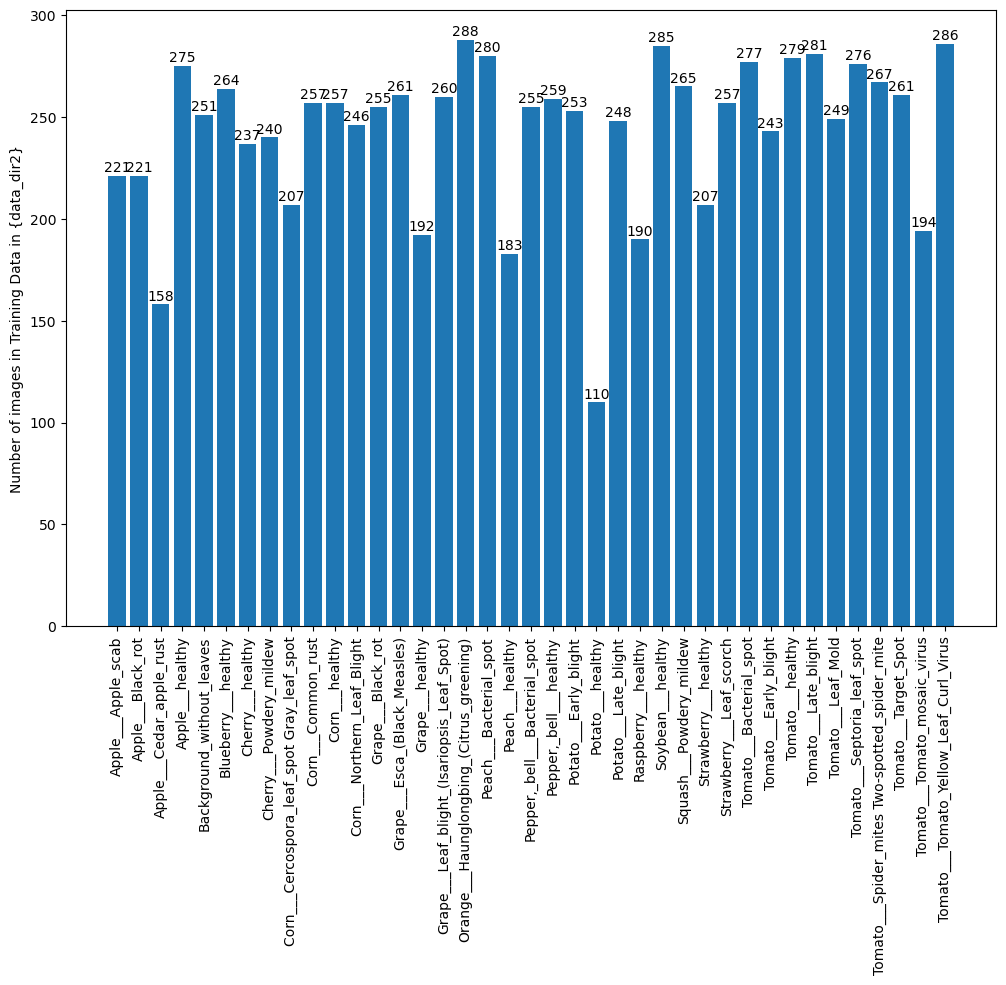

In [74]:
imgnum_barplot(out_dir_bs)

### 3.2.3. Bootstraping on Train Data with Augmentation

* using Bootstrapping to draw 1k images from each class in the augmented training data for 5 times (different classes are balanced)